In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

# Update the models for classification
class ModelA(nn.Module):
    def __init__(self):
        super(ModelA, self).__init__()
        self.fc1 = nn.Linear(28*28, 12)
        self.fc2 = nn.Linear(12, 12)
        self.fc3 = nn.Linear(12, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class ModelB(nn.Module):
    def __init__(self):
        super(ModelB, self).__init__()
        self.fc1 = nn.Linear(28*28, 11)
        self.fc2 = nn.Linear(11, 11)
        self.fc3 = nn.Linear(11, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class ModelC(nn.Module):
  def __init__(self):
        super(ModelC, self).__init__()
        self.fc1 = nn.Linear(28*28, 13)
        self.fc2 = nn.Linear(13, 13)
        self.fc3 = nn.Linear(13, 11)

  def forward(self, x):
      x = x.view(-1, 28*28)
      x = torch.relu(self.fc1(x))
      x = torch.relu(self.fc2(x))
      x = self.fc3(x)
      return x



model_a = ModelA()
model_b = ModelB()
model_c = ModelC()

# Loss function and optimizers
criterion = nn.CrossEntropyLoss()
optimizer_a = optim.Adam(model_a.parameters(), lr=0.01)
optimizer_b = optim.Adam(model_b.parameters(), lr=0.01)
optimizer_c = optim.Adam(model_c.parameters(), lr=0.01)


# def train_model(model, optimizer, train_loader):
#     model.train()
#     epochs = 100  # Number of epochs
#     losses = []  # List to store loss values
#     for epoch in range(epochs):
#         total_loss = 0
#         for images, labels in train_loader:
#             optimizer.zero_grad()
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#             total_loss += loss.item()
#         epoch_loss = total_loss / len(train_loader)
#         losses.append(epoch_loss)
#         print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
#     return losses

# losses_a = train_model(model_a, optimizer_a, train_loader)
# losses_b = train_model(model_b, optimizer_b, train_loader)
# losses_c = train_model(model_c, optimizer_c, train_loader)

def train_and_evaluate_model(model, optimizer, train_loader, test_loader):
    model.train()
    epochs = 100  # Number of epochs
    training_losses = []  # List to store loss values for training
    test_accuracies = []  # List to store accuracy values for testing

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        epoch_loss = total_loss / len(train_loader)
        training_losses.append(epoch_loss)

        # Evaluation phase
        correct = 0
        total = 0
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

        model.train()  # Set model back to training mode
    return training_losses, test_accuracies

# Now, train and evaluate each model
losses_a, accuracies_a = train_and_evaluate_model(model_a, optimizer_a, train_loader, test_loader)
losses_b, accuracies_b = train_and_evaluate_model(model_b, optimizer_b, train_loader, test_loader)
losses_c, accuracies_c = train_and_evaluate_model(model_c, optimizer_c, train_loader, test_loader)






Epoch 1/100, Loss: 0.9436, Accuracy: 75.62%
Epoch 2/100, Loss: 0.7528, Accuracy: 75.62%
Epoch 3/100, Loss: 0.7096, Accuracy: 76.69%
Epoch 4/100, Loss: 0.6870, Accuracy: 79.43%
Epoch 5/100, Loss: 0.6671, Accuracy: 77.87%
Epoch 6/100, Loss: 0.6532, Accuracy: 79.49%
Epoch 7/100, Loss: 0.6559, Accuracy: 78.13%
Epoch 8/100, Loss: 0.6478, Accuracy: 78.62%
Epoch 9/100, Loss: 0.6408, Accuracy: 81.73%
Epoch 10/100, Loss: 0.6401, Accuracy: 80.68%
Epoch 11/100, Loss: 0.6416, Accuracy: 80.69%
Epoch 12/100, Loss: 0.6382, Accuracy: 79.48%
Epoch 13/100, Loss: 0.6304, Accuracy: 77.66%
Epoch 14/100, Loss: 0.6409, Accuracy: 79.39%
Epoch 15/100, Loss: 0.6313, Accuracy: 77.94%
Epoch 16/100, Loss: 0.6352, Accuracy: 74.25%
Epoch 17/100, Loss: 0.6304, Accuracy: 80.28%
Epoch 18/100, Loss: 0.6262, Accuracy: 81.40%
Epoch 19/100, Loss: 0.6253, Accuracy: 81.84%
Epoch 20/100, Loss: 0.6293, Accuracy: 80.48%
Epoch 21/100, Loss: 0.6227, Accuracy: 79.92%
Epoch 22/100, Loss: 0.6213, Accuracy: 81.64%
Epoch 23/100, Loss:

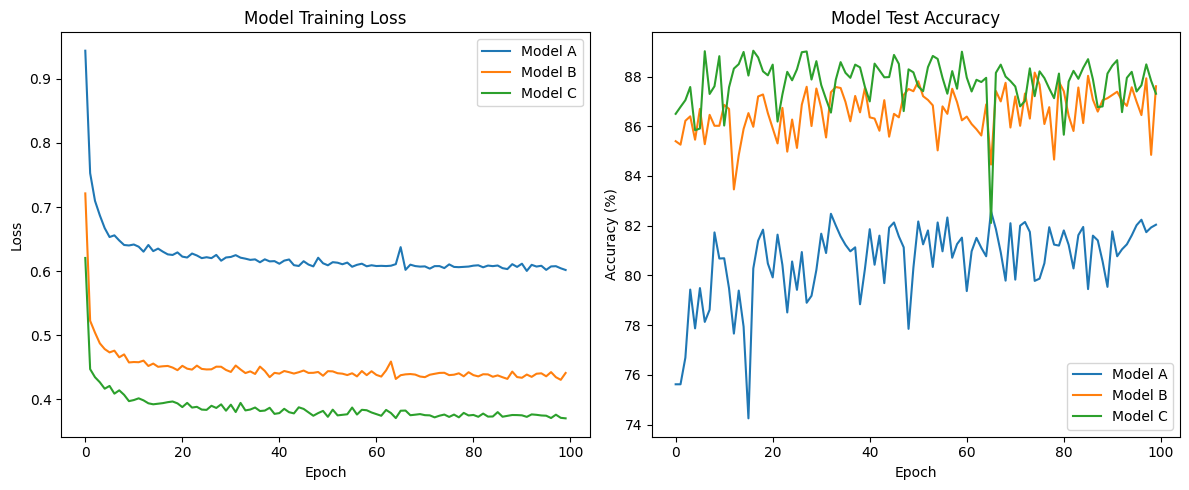

In [ ]:
# import torch
# import numpy as np
# import matplotlib.pyplot as plt

# plt.plot(losses_a, label='Model A')
# plt.plot(losses_b, label='Model B')
# plt.plot(losses_c, label='Model c')
# plt.title("Model Training Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()


# Plotting the training loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses_a, label='Model A')
plt.plot(losses_b, label='Model B')
plt.plot(losses_c, label='Model C')
plt.title("Model Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plotting the test accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies_a, label='Model A')
plt.plot(accuracies_b, label='Model B')
plt.plot(accuracies_c, label='Model C')
plt.title("Model Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()